ave total energy consumption:  0.049
total energy consumption:  1.627
min total energy consumption:  0.049
max total energy consumption:  0.05
diff max-min:  0.001
lora send:  198
lora receive:  198
packet arrival probability:  100.0
2.2909843939394e-07
0.00047864228751118455


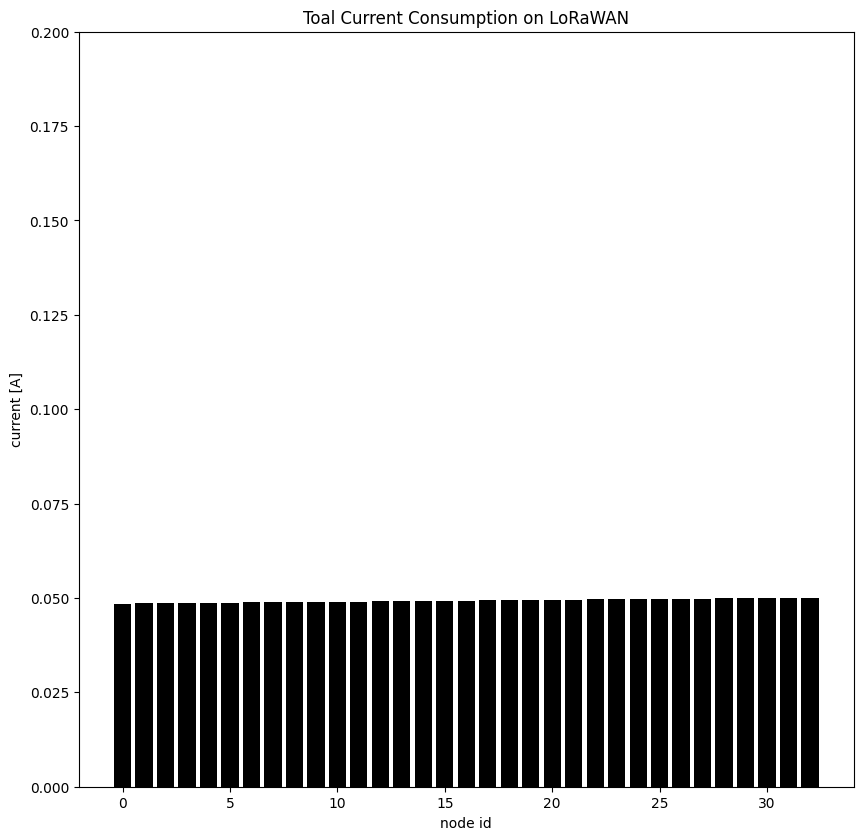

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import dataclasses
import copy
import datetime

@dataclasses.dataclass
class NodeData:
    id: int
    pos_x: float
    pos_y: float
    pos_z: float
    lora_network_addr: str
    ble_network_addr: str
    activation_time: float
    connection_interval: float
    total_energy_consumption: float
    lora_energy_consumption: float
    ble_energy_consusmption: float
    cnt_leader: int
    lora_send: int
    lora_receive: int
    ble_send: int
    ble_receive: int

file_suffix = "1hour"
csv_file = "/Users/tozastation/workspace/tozastation/simulate-lorawan/result/lorawan/" + file_suffix + ".csv"
node_datas = []
node_data_csv = pd.read_csv(csv_file)
print("ave total energy consumption: ", round(node_data_csv["total_energy_consumption"].mean(), 3))
print("total energy consumption: ", round(node_data_csv["total_energy_consumption"].sum(), 3))

min_lora_e = round(node_data_csv["total_energy_consumption"].min(), 3)
max_lora_e = round(node_data_csv["total_energy_consumption"].max(), 3)
print("min total energy consumption: ", round(min_lora_e, 3))
print("max total energy consumption: ", round(max_lora_e, 3))
print("diff max-min: ", round(max_lora_e-min_lora_e, 3))

lora_send = node_data_csv["lora_send"].sum()
lora_receive = node_data_csv["lora_receive"].sum()
print("lora send: ", lora_send)
print("lora receive: ", lora_receive)
print("packet arrival probability: ", lora_send/lora_receive * 100)

print(round(node_data_csv["total_energy_consumption"].var(), 20))
print(node_data_csv["total_energy_consumption"].std())
for index, row in node_data_csv.iterrows():
    node = NodeData(
        int(row[0]), 
        round(float(row[1]), 6),
        round(float(row[2]), 6),
        round(float(row[3]), 6),
        row[4],
        row[5],
        round(float(row[6]), 6),
        round(float(row[7]), 6),
        round(float(row[8]), 6),
        round(float(row[9]), 6),
        round(float(row[10]), 6),
        int(row[11]),
        int(row[12]),
        int(row[13]),
        int(row[14]),
        int(row[15])
    )
    node_datas.append(node)

fig_e = plt.figure(figsize=(10, 10), dpi=100)
ax_e = fig_e.add_subplot(111)
ax_e.set_title("Toal Current Consumption on LoRaWAN")
ax_e.set_xlabel("node id")
ax_e.set_ylabel("current [A]")
#
ax_e.set_ylim(0, 0.2)

for node_data in node_datas:
    ax_e.bar(node_data.id, node_data.total_energy_consumption, color='black')

# file_name = "lorawan_" + file_suffix + "_out_.png"
# fig_e.savefig("/Users/tozastation/workspace/tozastation/simulate-lorawan/output/lorawan/" + file_name)

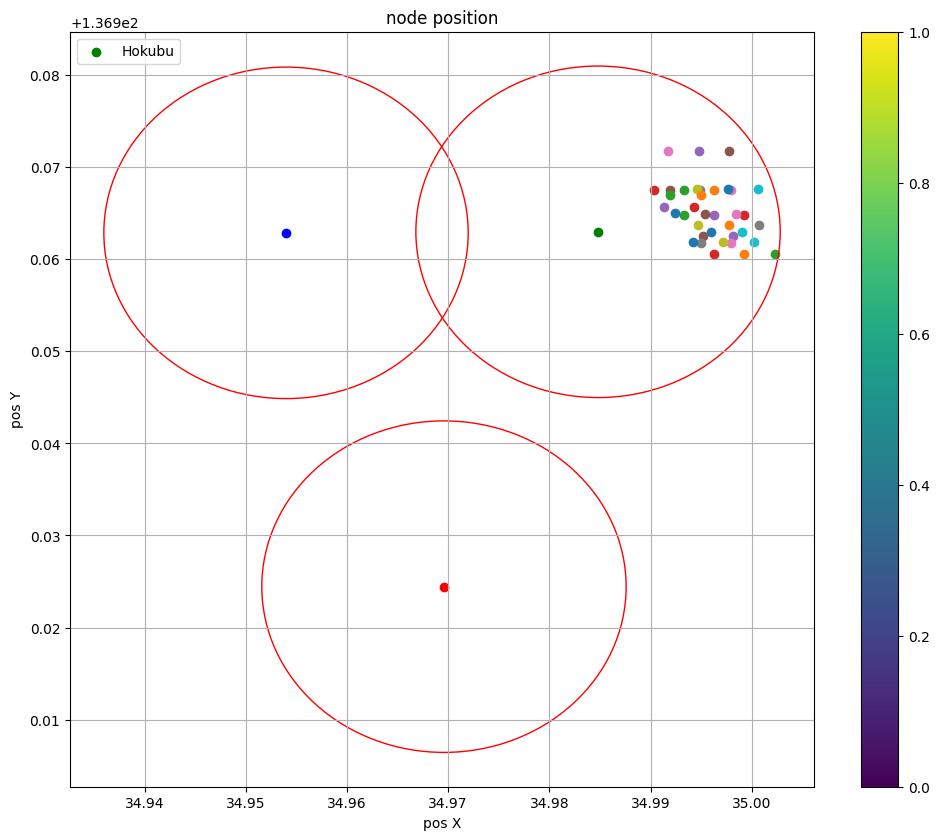

In [51]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import dataclasses
import copy
import datetime
import matplotlib.patches as patches

@dataclasses.dataclass
class NodeData:
    id: int
    pos_x: float
    pos_y: float
    pos_z: float
    activation_time: float
    connection_interval: float
    total_energy_consumption: float
    lora_energy_consumption: float
    ble_energy_consusmption: float

@dataclasses.dataclass
class LoRaWANGateway:
    latitude: float
    longitude: float
        
csv_file = "/Users/tozastation/workspace/tozastation/simulate-lorawan/result/20200501_071119_group_log.csv"
node_datas = []
node_data_csv = pd.read_csv(csv_file)

for index, row in node_data_csv.iterrows():
    node = NodeData(
        int(row[0]), 
        round(float(row[1]), 6),
        round(float(row[2]), 6),
        round(float(row[3]), 6),
        round(float(row[4]), 6),
        round(float(row[5]), 6),
        round(float(row[6]), 6),
        round(float(row[7]), 6),
        round(float(row[8]), 6)
    )
    node_datas.append(node)

# ----
fig_p = plt.figure(figsize=(12, 10), dpi=100)
ax_p = fig_p.add_subplot(111)
ax_p.set_title("node position")
ax_p.set_xlabel("pos X")
ax_p.set_ylabel("pos Y")

# plot gateway
gw_a = LoRaWANGateway(34.969587, 136.924443)
gw_b = LoRaWANGateway(34.953981, 136.962864)
gw_c = LoRaWANGateway(34.984811, 136.962978)
ax_p.scatter(gw_a.latitude, gw_a.longitude, color='red')
ax_p.scatter(gw_b.latitude, gw_b.longitude, color='blue')
ax_p.scatter(gw_c.latitude, gw_c.longitude, color='green', label='Hokubu')
gw_c_range = patches.Circle(xy=(gw_a.latitude, gw_a.longitude), radius=0.018, ec='r', fill=False)
ax_p.add_patch(gw_c_range)
gw_c_range = patches.Circle(xy=(gw_b.latitude, gw_b.longitude), radius=0.018, ec='r', fill=False)
ax_p.add_patch(gw_c_range)
gw_c_range = patches.Circle(xy=(gw_c.latitude, gw_c.longitude), radius=0.018, ec='r', fill=False)
ax_p.add_patch(gw_c_range)
# plot node
plot = ""
for node_data in node_datas:
    latitude = node_data.pos_x
    longitude = node_data.pos_y
    plot = ax_p.scatter(latitude, longitude)

fig_p.colorbar(plot)
ax_p.legend(loc='upper left')
ax_p.grid(True)
# write file
file_prefix = datetime.datetime.now().isoformat()
file_name = file_prefix + "_lorawan_node_position.png"
# fig_p.savefig("/Users/tozastation/workspace/tozastation/simulate-lorawan/output/" + file_name)

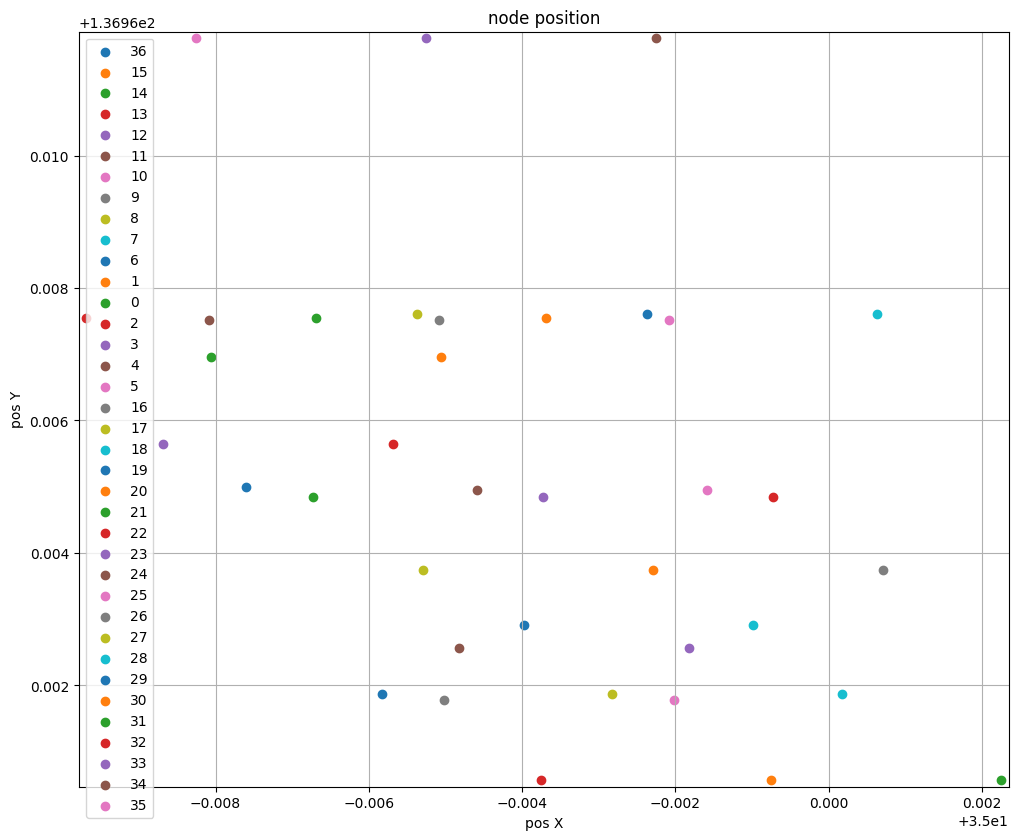

In [24]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import dataclasses
import copy
import datetime
import matplotlib.patches as patches

@dataclasses.dataclass
class NodeData:
    id: int
    pos_x: float
    pos_y: float
    pos_z: float
    activation_time: float
    connection_interval: float
    total_energy_consumption: float
    lora_energy_consumption: float
    ble_energy_consusmption: float

@dataclasses.dataclass
class LoRaWANGateway:
    latitude: float
    longitude: float
        
csv_file = "/Users/tozastation/workspace/tozastation/simulate-lorawan/result/20200501_071119_group_log.csv"
node_datas = []
node_data_csv = pd.read_csv(csv_file)

for index, row in node_data_csv.iterrows():
    node = NodeData(
        int(row[0]), 
        round(float(row[1]), 6),
        round(float(row[2]), 6),
        round(float(row[3]), 6),
        round(float(row[4]), 6),
        round(float(row[5]), 6),
        round(float(row[6]), 6),
        round(float(row[7]), 6),
        round(float(row[8]), 6)
    )
    node_datas.append(node)

# ----
fig_p = plt.figure(figsize=(12, 10), dpi=100)
ax_p = fig_p.add_subplot(111)
ax_p.set_title("node position")
ax_p.set_xlabel("pos X")
ax_p.set_ylabel("pos Y")

# plot gateway
gw_a = LoRaWANGateway(34.969392, 136.924615)
gw_b = LoRaWANGateway(34.953981, 136.962864)
gw_c = LoRaWANGateway(34.973183, 136.967018)
ax_p.scatter(gw_a.latitude, gw_a.longitude, color='black')
ax_p.scatter(gw_b.latitude, gw_b.longitude, color='black')
ax_p.scatter(gw_c.latitude, gw_c.longitude, color='black')
gw_a_range = patches.Circle(xy=(gw_a.latitude, gw_a.longitude), radius=0.005, ec='r', fill=False)
ax_p.add_patch(gw_a_range)

min_x:float = node_datas[0].pos_x
max_x:float = node_datas[0].pos_x
min_y:float = node_datas[0].pos_y
max_y:float = node_datas[0].pos_y
for node_data in node_datas:
    if min_x > node_data.pos_x: min_x = node_data.pos_x
    if max_x < node_data.pos_x: max_x = node_data.pos_x
    if min_y > node_data.pos_y: min_y = node_data.pos_y
    if max_y < node_data.pos_y: max_y = node_data.pos_y

ax_p.set_xlim([min_x-0.0001,max_x+0.0001])
ax_p.set_ylim([min_y-0.0001,max_y+0.0001])
# plot node
plot = ""
for node_data in node_datas:
    latitude = node_data.pos_x
    longitude = node_data.pos_y
    plot = ax_p.scatter(latitude, longitude, cmap='jet', label=str(node_data.id))

ax_p.grid(True)
#fig_p.colorbar(plot)
ax_p.legend(loc='upper left')
# write file
file_prefix = datetime.datetime.now().isoformat()
file_name = file_prefix + "_lorawan_node_position.png"
fig_p.savefig("/Users/tozastation/workspace/tozastation/simulate-lorawan/output/" + file_name)

In [33]:
import numpy
x1 = 34.993315
y1 = 136.967541
x2 = 34.990315
y2 = 136.967541
a = numpy.array([x1, y1])
b = numpy.array([x2, y2])
u = b - a
numpy.linalg.norm(u)

0.0030000000000001137